# Relevant Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distribute_data import Datasets
from fedavg import FederatedSystem
from asd import *

### Create Adversaries

In [2]:
dataHandler = Datasets()
fashion_baseline = FederatedSystem('fashion')
fashion_adversary = FederatedSystem('fashion')
mnist_baseline = FederatedSystem('digits')
mnist_adversary = FederatedSystem('digits')


fashion_train_labels = fashion_adversary.client_train_labels
fashion_baseline.client_train_data = fashion_adversary.client_train_data
fashion_baseline.client_train_labels = fashion_train_labels
fashion_adv_labels = dataHandler.create_adversary(fashion_train_labels, client = 5, true = 8, target = 3)
fashion_adversary.poison(fashion_adv_labels)

mnist_train_labels = mnist_adversary.client_train_labels
mnist_baseline.client_train_data = mnist_adversary.client_train_data
mnist_baseline.client_train_labels = mnist_train_labels
mnist_adv_labels = dataHandler.create_adversary(mnist_train_labels, client = 2, true = 4, target = 9)
mnist_adversary.poison(mnist_adv_labels)

### Train models without asd activation

In [3]:
wf_c, bf_c, tallyf_c = fashion_baseline.FedAvg(rounds = 20)
wf_adv, bf_adv, tallyf_adv = fashion_adversary.FedAvg(rounds = 20)

wm_c, bm_c, tallym_c = mnist_baseline.FedAvg(rounds = 20)
wm_adv, bm_adv, tallym_adv = mnist_adversary.FedAvg(rounds = 20)

Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20


### Performance Analysis via Test Accuracy

In [4]:
test_acc_fc, test_loss_fc = fashion_baseline.test_acc()
test_acc_fadv, test_loss_fadv = fashion_adversary.test_acc()

test_acc_mc, test_loss_mc = mnist_baseline.test_acc()
test_acc_madv, test_loss_madv = mnist_adversary.test_acc()

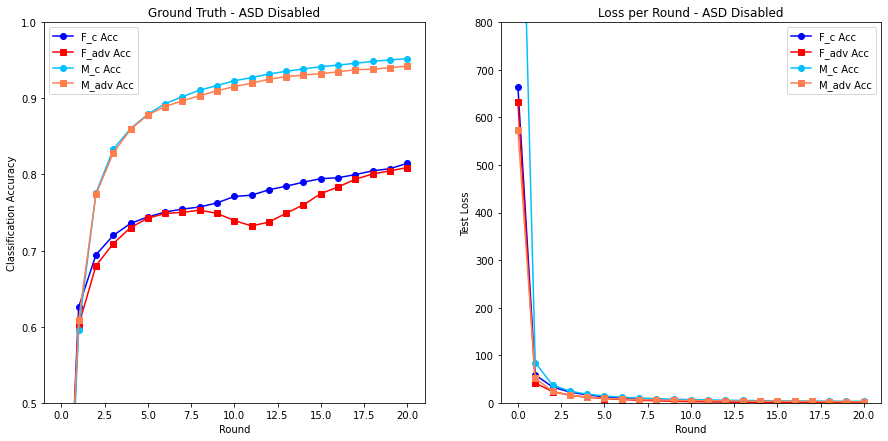

In [10]:
x = range(21)
r, c = 1, 2
fig = plt.figure(figsize = (15, 7))

fig.add_subplot(r, c, 1)
plt.plot(x, test_acc_fc, color = 'blue', label = 'F_c Acc', marker = 'o')
plt.plot(x, test_acc_fadv, color = 'red', label = 'F_adv Acc', marker = 's')
plt.plot(x, test_acc_mc, color = 'deepskyblue', label = 'M_c Acc', marker = 'o')
plt.plot(x, test_acc_madv, color = 'coral', label = 'M_adv Acc', marker = 's')
plt.ylabel('Classification Accuracy')
plt.xlabel('Round')
plt.title('Ground Truth - ASD Disabled')
plt.ylim([0.5, 1])
plt.legend()

fig.add_subplot(r, c, 2)
plt.plot(x, test_loss_fc, color = 'blue', label = 'F_c Acc', marker = 'o')
plt.plot(x, test_loss_fadv, color = 'red', label = 'F_adv Acc', marker = 's')
plt.plot(x, test_loss_mc, color = 'deepskyblue', label = 'M_c Acc', marker = 'o')
plt.plot(x, test_loss_madv, color = 'coral', label = 'M_adv Acc', marker = 's')
plt.ylabel('Test Loss')
plt.xlabel('Round')
plt.title('Loss per Round - ASD Disabled')
plt.ylim([0, 800])
plt.legend()
plt.show()

### Proof of Concept pt.1

In [6]:
print(f'Clean Fashion Tally: {tallyf_c}')
print(f'Poison Fashion Tally: {tallyf_adv}\n\n')

print(f'Clean MNIST Tally: {tallym_c}')
print(f'Poison MNIST Tally: {tallym_adv}')

Clean Fashion Tally: [0, 0, 10, 0, 0, 0, 0, 0, 0, 0]
Poison Fashion Tally: [0, 0, 8, 0, 0, 2, 0, 0, 0, 0]


Clean MNIST Tally: [0, 0, 0, 0, 10, 0, 0, 0, 0, 0]
Poison MNIST Tally: [0, 0, 0, 0, 10, 0, 0, 0, 0, 0]


### Enabling ASD

In [7]:
# Refreshing Models
fashion_baseline = FederatedSystem('fashion')
fashion_adversary = FederatedSystem('fashion')
mnist_baseline = FederatedSystem('digits')
mnist_adversary = FederatedSystem('digits')

# Changing targets
fashion_train_labels = fashion_adversary.client_train_labels
fashion_baseline.client_train_data = fashion_adversary.client_train_data
fashion_baseline.client_train_labels = fashion_train_labels
fashion_adv_labels = dataHandler.create_adversary(fashion_train_labels, client = 0, true = 3, target = 7)
fashion_adversary.poison(fashion_adv_labels)

mnist_train_labels = mnist_adversary.client_train_labels
mnist_baseline.client_train_data = mnist_adversary.client_train_data
mnist_baseline.client_train_labels = mnist_train_labels
mnist_adv_labels = dataHandler.create_adversary(mnist_train_labels, client = 9, true = 2, target = 5)
mnist_adversary.poison(mnist_adv_labels)

In [9]:
wf_c, bf_c, tallyf_c = fashion_baseline.FedAvg(rounds = 20, enable = 1, threshold = 10)
wf_adv, bf_adv, tallyf_adv = fashion_adversary.FedAvg(rounds = 20, enable = 1, threshold = 10)

wm_c, bm_c, tallym_c = mnist_baseline.FedAvg(rounds = 20, enable = 1, threshold = 10)
wm_adv, bm_adv, tallym_adv = mnist_adversary.FedAvg(rounds = 20, enable = 1, threshold = 10)

Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20


In [11]:
test_acc_fc, test_loss_fc = fashion_baseline.test_acc()
test_acc_fadv, test_loss_adv = fashion_adversary.test_acc()

test_acc_mc, test_loss_mc = mnist_baseline.test_acc()
test_acc_madv, test_loss_madv = mnist_adversary.test_acc()

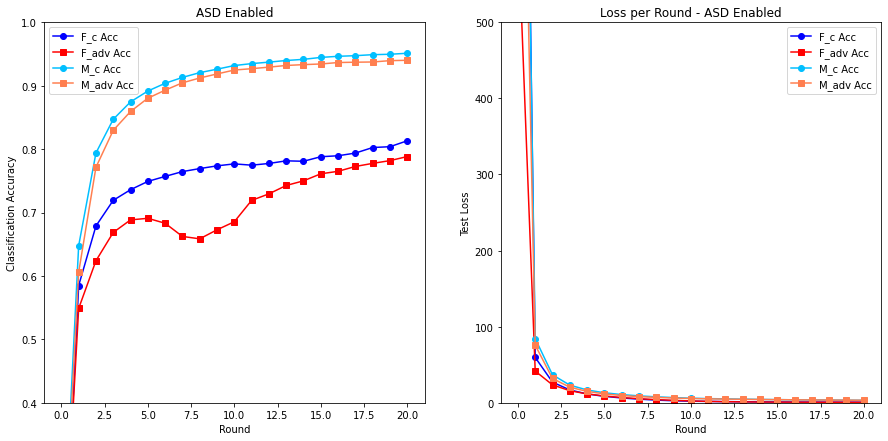

In [16]:
x = range(21)
r, c = 1, 2
fig = plt.figure(figsize = (15, 7))

fig.add_subplot(r, c, 1)
plt.plot(x, test_acc_fc, color = 'blue', label = 'F_c Acc', marker = 'o')
plt.plot(x, test_acc_fadv, color = 'red', label = 'F_adv Acc', marker = 's')
plt.plot(x, test_acc_mc, color = 'deepskyblue', label = 'M_c Acc', marker = 'o')
plt.plot(x, test_acc_madv, color = 'coral', label = 'M_adv Acc', marker = 's')
plt.ylabel('Classification Accuracy')
plt.xlabel('Round')
plt.title('ASD Enabled')
plt.ylim([0.4, 1])
plt.legend()

fig.add_subplot(r, c, 2)
plt.plot(x, test_loss_fc, color = 'blue', label = 'F_c Acc', marker = 'o')
plt.plot(x, test_loss_fadv, color = 'red', label = 'F_adv Acc', marker = 's')
plt.plot(x, test_loss_mc, color = 'deepskyblue', label = 'M_c Acc', marker = 'o')
plt.plot(x, test_loss_madv, color = 'coral', label = 'M_adv Acc', marker = 's')
plt.ylabel('Test Loss')
plt.xlabel('Round')
plt.title('Loss per Round - ASD Enabled')
plt.ylim([0, 500])
plt.legend()
plt.show()

In [15]:
print(f'Clean Fashion Tally: {tallyf_c}')
print(f'Poison Fashion Tally: {tallyf_adv}\n\n')

print(f'Clean MNIST Tally: {tallym_c}')
print(f'Poison MNIST Tally: {tallym_adv}')

Clean Fashion Tally: [10, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Poison Fashion Tally: [10, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Clean MNIST Tally: [0, 0, 0, 10, 0, 0, 0, 0, 0, 0]
Poison MNIST Tally: [0, 0, 0, 10, 0, 0, 0, 0, 0, 0]
